In [4]:
"""CA Assignment 1 Multi-armed Bandit

Implementation of the Multi-armed Bandit Problem

Classes
-------
Environment
    Class that models the Environment the agent is participating in.
    Source of rewards
Agent
    Interacts with the environment to maximise rewards
Methods
-------
singleExperiment(qStar, numArms, numActions, eps)
    Execute a single experiment of the multi-armed bandit problem
"""

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

class Environment:

    """
    Class that models the environment the agent is participating in.
    Source of rewards
    ...

    Attributes
    ----------
    qStar : Array
        A normal distributed array of the true values of each arm

    Methods
    -------
    getReward(armSelected=int)
        Generates a reward to the agent based on the arm selected by the agent
        The reward follows a normal distribution
    """

    def __init__(self, qStar):

        """
        Constructs the attributes for Environment object

        Parameters
        ----------
        qStar : Array
            A normal distributed array of the true values of each arm
        """

        # True value
        self.qStar = qStar

    def getReward(self, armSelected):

        """
        Generates a reward to the agent based on the arm selected by the agent
        The reward follows a normal distribution

        Parameters
        ----------
        armSelected : int
            The action arm selected by the agent

        Returns
        -------
        reward : float
            The reward for choosing an arm
        """

        reward = np.random.normal(self.qStar[armSelected], 1)

        return reward

class Agent:

    """
    Interacts with the Environment to maximise rewards
    ...

    Attributes
    ----------
    numArms : int
        Number of actions choices
    eps : float
        The probability of the agent exploring rather than exploiting the environemnt

    Methods
    -------
    updateQ(arm=int, reward=float)
        Updates the estimated value of each action by the agent
    armSelection()
        The agent selects the arm in a exploration or exploitation method
    """

    def __init__(self, numArms, eps):

        """
        Constructs the attributes for Environment object

        Parameters
        ----------
        numArms : int
            Number of actions choices
        eps : float
            The probability of the agent exploring rather than exploiting the environemnt
        """

        self.numArms = numArms
        self.eps = eps

        # record estimated values for each arm
        self.estimatedValue = np.zeros(numArms)

        # record numbers of pulls or plays for each arm
        self.numPulls = np.zeros(numArms)

    def armSelection(self):

        """
        The agent selects the arm in a exploration or exploitation method

        Parameters
        ----------
        Nothing

        Returns
        -------
        arm = int
            The selected arm by the agent
        """

        # Exploitation
        if np.random.random() > self.eps:
            arm = np.argmax(self.estimatedValue)
        # Exploration
        else:
            arm = np.random.randint(self.numArms)

        return arm

    def updateQ(self, arm, reward):

        """
        Updates the estimated value of each action by the agent

        Parameters
        ----------
        arm : int
            The action arm selected by the agent
        reward : float
            The reward from the environment after the agent takes an action

        Returns
        -------
        Nothing
        """

        # Increment the number of times an action is taken
        self.numPulls[arm] += 1
        # Update the estimated value
        self.estimatedValue[arm] += (reward - self.estimatedValue[arm]) *  (1.0/self.numPulls[arm])


def singleExperiment(qStar, numArms, numActions, eps):

    """
    Execute a single experiment of the multi-armed bandit problem

    Parameters
    ----------
    qStar : Array
        A normal distributed array of the true values of each arm
    numArms : int
        Number of actions choices
    numActions : int
        Total number of actions taken by the agent in a single experiment
    eps : float
        The probability of the agent exploring rather than exploiting the environemnt

    Returns
    -------
    rewardList : Array
        A reward tracker of all the rewards gained by the agent after taking each action

    optimalActionList : List
        A optimal action counter that counts the number of times an optimal action is taken
    """

    environment = Environment(qStar=qStar)
    agent = Agent(numArms=numArms, eps=eps)
    rewardList = []
    optimalActionList = np.zeros(numActions)

    for action in range(numActions):
        arm = agent.armSelection()
        reward = environment.getReward(armSelected=arm)
        agent.updateQ(arm=arm, reward=reward)
        rewardList.append(reward)

        # Determine if arm chosen is optimal by checking if true value of the arm is the maximum value
        if arm == np.argmax(qStar):
          # Increase count of number of optimal actions at that time step by 1
          optimalActionList[action] += 1

    return np.array(rewardList), optimalActionList

def visualizer(epsList, totalAverageRewards, totalOptimalActions):

    """
    Plot visualizer of the results

    Parameters
    ----------
    epsList : List
        List of eps values used
    epsRewards : List
        List of max average rewards gained from each eps value
    epsActions : List
        List of max optimal actions taken from each eps value

    Returns
    -------
    Nothing
    """

    # Ploting the graph
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))

    for i in range(len(epsList)):
        ax[0].plot(totalAverageRewards[i], "-", label=r'$\varepsilon$ = {}'.format(epsList[i]))
        ax[1].plot(totalOptimalActions[i], "-", label=r'$\varepsilon$ = {}'.format(epsList[i]))

    # Setting up the graph axis

    epsRewards = []
    epsActions = []

    epsRewards.append(max(totalAverageRewards[i]))
    y_max0 = max(totalAverageRewards[i]) + 0.5
    y_range0 = np.arange(0, y_max0, 0.5).flatten()

    ax[0].set_ylim([0, y_max0])
    ax[0].yaxis.set_ticks(y_range0)
    ax[0].spines['left'].set_position(('axes', 0))
    ax[0].spines['bottom'].set_position(('data', 0))
    ax[0].spines[['right', 'top']].set_visible(False)
    ax[0].set_xlabel("Steps")
    ax[0].set_ylabel("Average Reward")
    ax[0].yaxis.set_ticks(y_range0)
    ax[0].legend(loc='lower right')


    epsActions.append(max(totalOptimalActions[i]))
    y_max1 = max(totalOptimalActions[i]) + 10.0
    y_range1 = np.arange(0, y_max1, 10.0).flatten()

    ax[1].spines['left'].set_position(('axes', 0))
    ax[1].spines['bottom'].set_position(('data', 0))
    ax[1].spines[['right', 'top']].set_visible(False)
    ax[1].set_xlabel("Steps")
    ax[1].set_ylabel("% Optimal Action")
    ax[1].set_ylim([0, y_max1])
    ax[1].yaxis.set_ticks(y_range1)
    ax[1].legend(loc='lower right')

    plt.show()


def main():
    numExperiment = 1000 # 2000
    numActions = 500
    numArms = 10
    epsList = [0, 0.01, 0.1]

    # Generating the True Value
    np.random.seed(5)
    qStar = np.random.normal(0,1,10)



    # To be used for results plotting
    totalAverageRewards = []
    totalOptimalActions = []

    for eps in epsList:
        # Main Reward Tracker across all experiments
        rewardTracker = np.zeros((numActions,))

        # Optimal action tracker across all experiments
        optimalActionTracker = np.zeros(numActions)

        for experiment in range(numExperiment):
            totalRewards, optimalActions = singleExperiment(qStar=qStar, numArms=numArms, numActions=numActions, eps=eps)
            rewardTracker += totalRewards
            optimalActionTracker += optimalActions


        averageRewards = rewardTracker / np.float(numExperiment)
        optimalActionPercent = (optimalActionTracker / numExperiment) * 100

        # Timestep 0 has 0 rewards
        # Previously ommitted as it will cause zero-division error
        averageRewards = np.insert(averageRewards.flatten(), 0, 0.0)
        totalAverageRewards.append(averageRewards)
        print("Average Reward for {} is {}".format(eps, max(averageRewards)))

        optimalActionPercent = np.insert(optimalActionPercent.flatten(), 0, 0.0)
        totalOptimalActions.append(optimalActionPercent)
        print("Optimal Action for {} is {}".format(eps, max(optimalActionPercent)))

    visualizer(epsList, totalAverageRewards, totalOptimalActions)



C:\Users\alpho\AppData\Local\Temp\ipykernel_31052\1026553203.py:305: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  averageRewards = rewardTracker / np.float(numExperiment)


Average Reward for 0 is 1.5475427215178665
Optimal Action for 0 is 51.5
Average Reward for 0.01 is 1.9071250001071076
Optimal Action for 0.01 is 65.0
Average Reward for 0.1 is 2.313445808586926
Optimal Action for 0.1 is 92.10000000000001


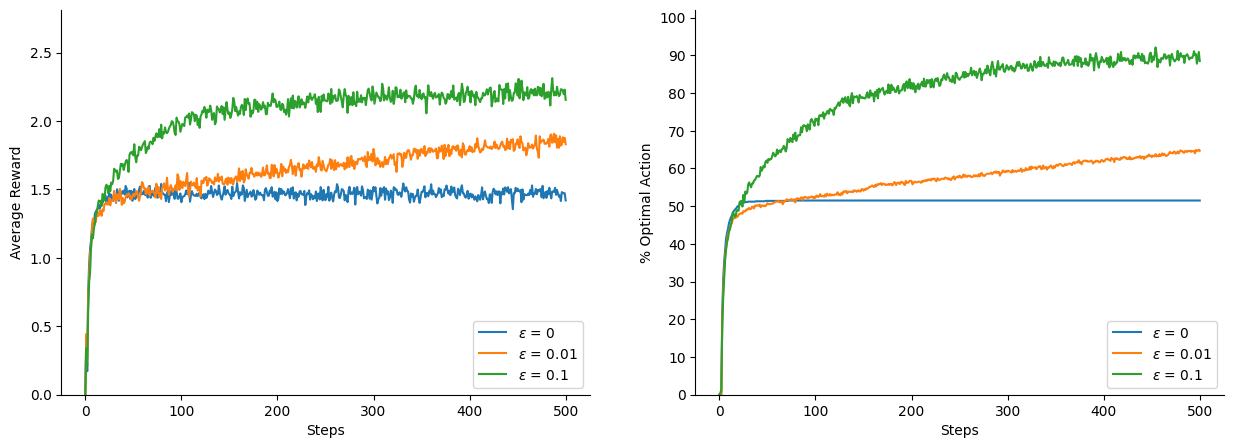

In [5]:
main()